In [1]:
from utils.binaries import *
from utils.plotting import *
from utils import CONSTANTS
from utils.Auger.SD import SdHisto

10:27:12 (   +1.3s) [INFO   ] -- import logging
10:27:12 (    +2ms) [INFO   ] -- import numpy as np
10:27:12 (    +6ms) [INFO   ] -- import uncertainties
10:27:12 (    +2ms) [INFO   ] -- import numpy as np
10:27:12 (    +6ms) [INFO   ] -- import uncertainties
10:27:12 (  +231ms) [INFO   ] -- import pandas as pd
10:27:12 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
10:27:12 (    +2ms) [INFO   ] -- import binaries.tools as tools
10:27:12 (  +281ms) [INFO   ] -- import matplotlib.pyplot as plt
10:27:13 (  +326ms) [INFO   ] -- import seaborn as so
10:27:13 (    +3ms) [INFO   ] -- import plotting.tools as plot
10:27:13 (    +6ms) [DEBUG  ] -- font size set to 9.5
10:27:13 (    +1ms) [DEBUG  ] -- label size set to 13.0
10:27:13 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
10:27:13 (    +1ms) [DEBUG  ] -- markersize set to 2.0
10:27:13 (    +1ms) [DEBUG  ] -- usetex set to False


In [2]:
def read_file(path):

    path = f'/cr/data01/filip/Data/muonAcquisition/night/' + path
    coinc_hist = lambda x : np.array([int(e.split(' ')[-4]) for e in x]) # ...
    all_hist = lambda x : np.array([int(e.split(' ')[-1]) for e in x])
    peak_histo, rates = [], []

    with open(path, 'r') as source:

        baseline = 0

        is_peak_histogram = False
        is_all_histogram = False
        for i, line in enumerate(source.readlines()):
            line = line.strip()

            if line.startswith('Offset'):
                baseline = int(line.split(' ')[-1])

            if line == 'Peak': 
                is_peak_histogram = True
                continue
            elif line == 'Charge':
                is_peak_histogram = False
            
            if is_peak_histogram: peak_histo.append(line)
            if line == '======ssd:':
                is_all_histogram = True
                continue

            if is_all_histogram: rates.append(line)

        peak_histo = np.array(coinc_hist(peak_histo))
        bin0 = int(rates[0].split(' ')[3])

    return peak_histo, all_hist(rates[1:]), bin0 - baseline



In [30]:
_, ssd_enable, bins = read_file("1714040526_643")
ssd_disable = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v40/peak.txt')[3, 4:]

10:45:08 (  +24.6s) [DEBUG  ] -- font size set to 9.5
10:45:08 (    +1ms) [DEBUG  ] -- label size set to 13.0
10:45:08 (    +1ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
10:45:08 (    +0ms) [DEBUG  ] -- markersize set to 2.0
10:45:08 (    +1ms) [DEBUG  ] -- usetex set to True


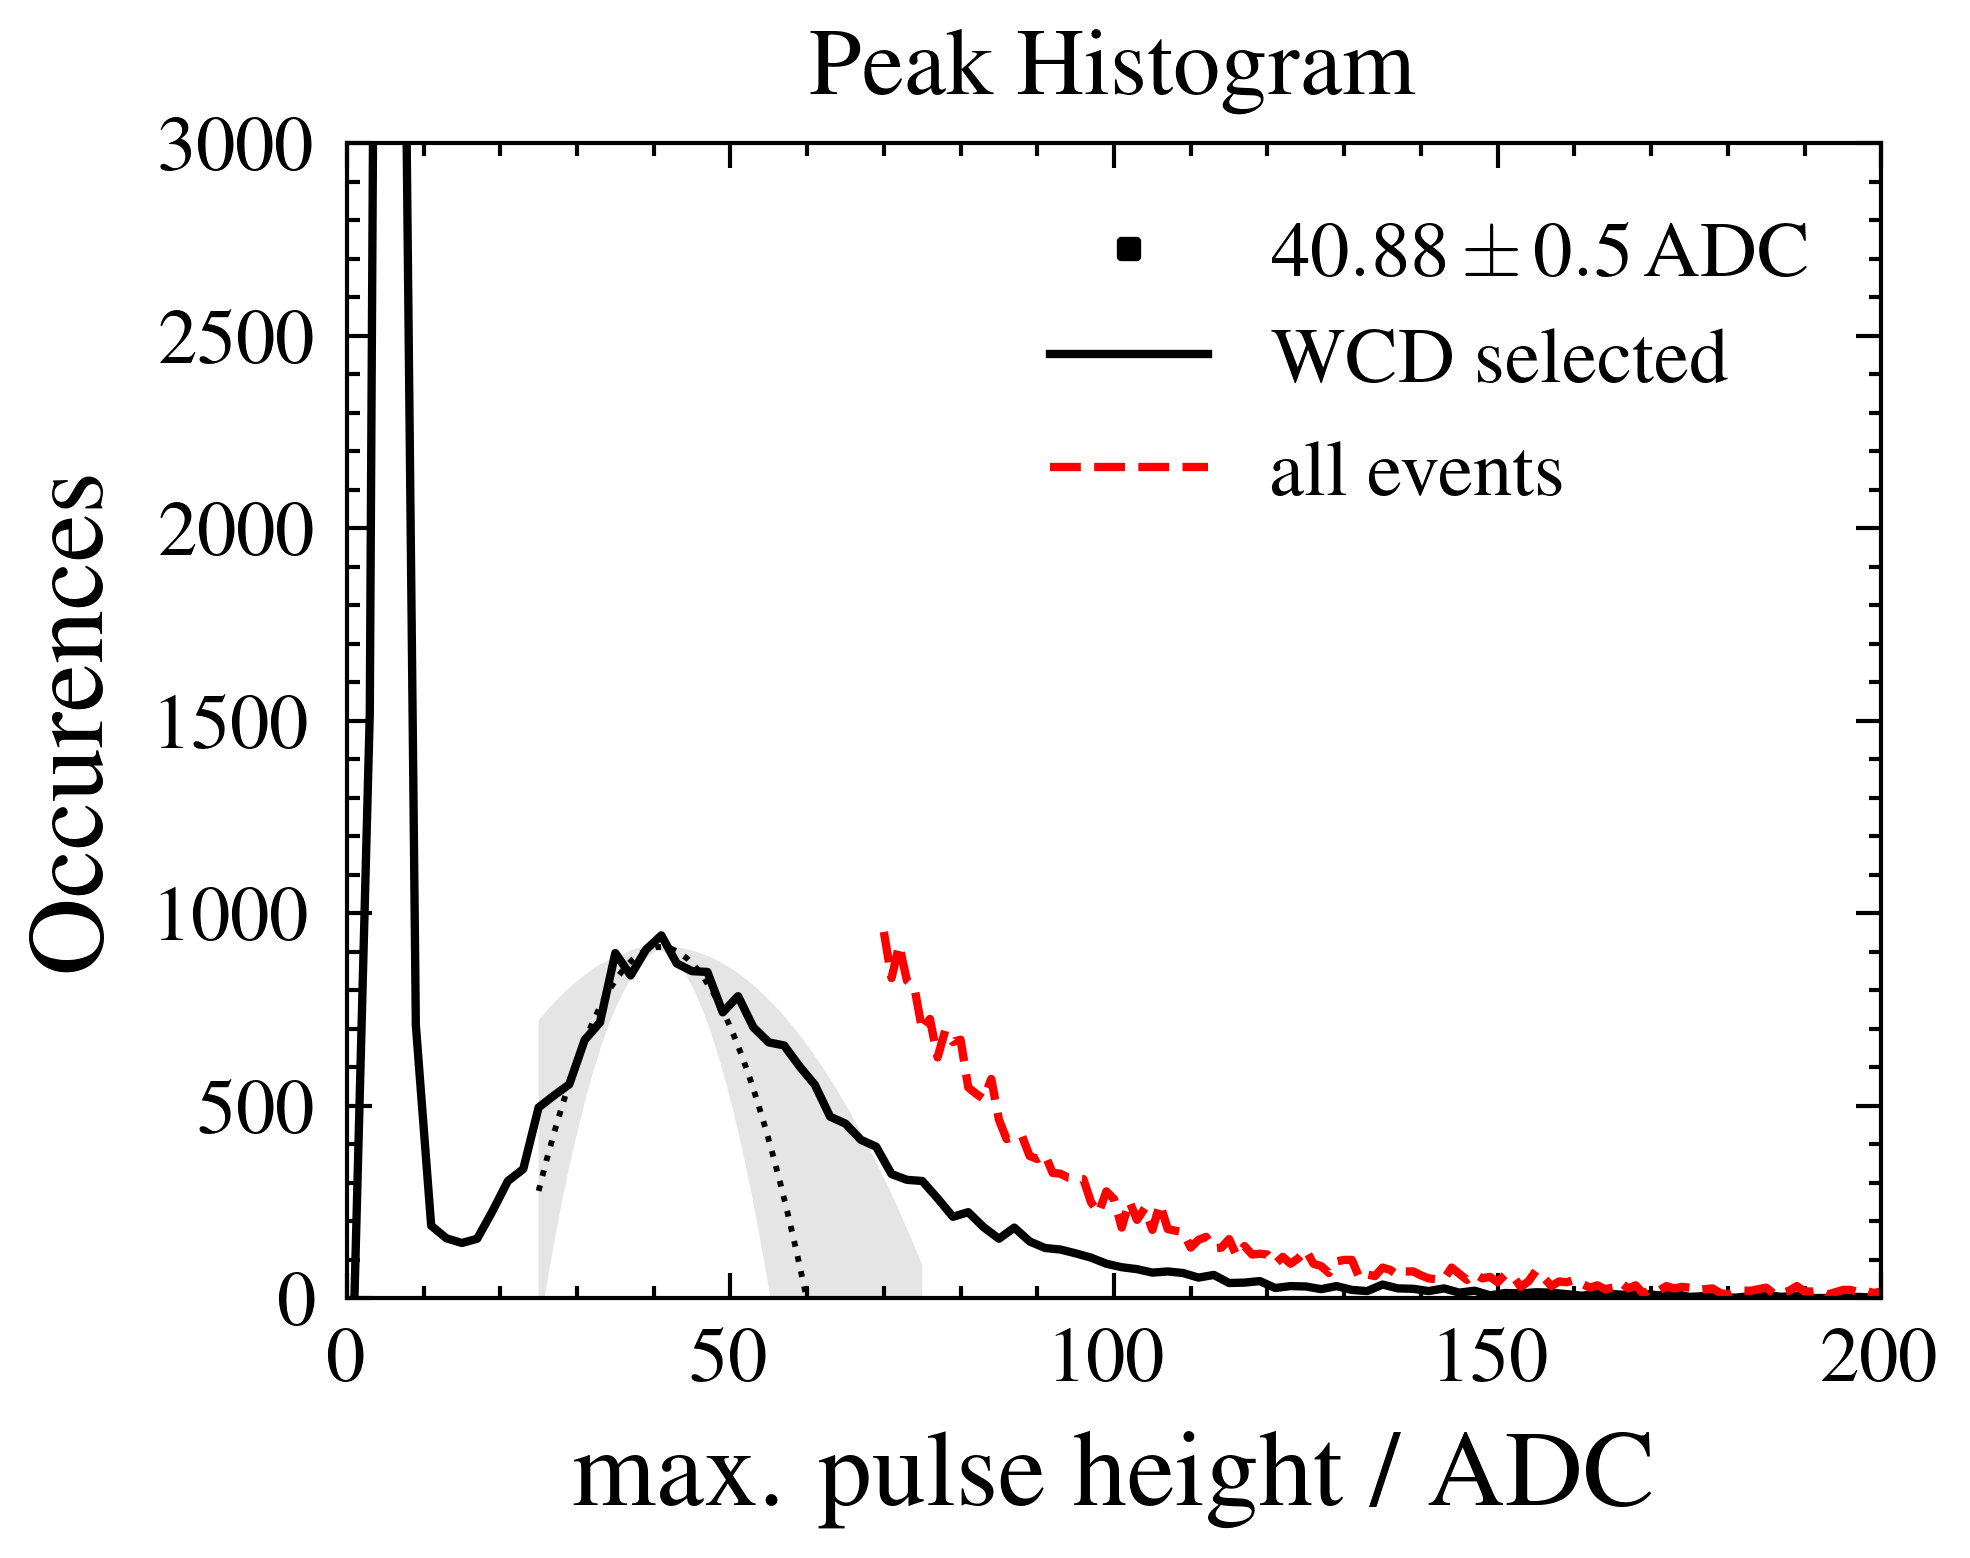

In [37]:
set_plt_style('double tex')


X = np.linspace(25, 75, 50)
popts = SdHisto.fit_ssd(ssd_disable[:99])
pcov = uncertainties.correlation_matrix(popts)
pvals = [p.n for p in popts]

err_up, err_down = tools.bootstrap_ci(SdHisto.parabola, pvals, pcov, X, ci=0.4)
mip = popts[1]


plt.ylim(0, 3000)
plt.xlim(0, 200)

plt.scatter([], [], c='k', marker='s', label=f"${mip.n:.2f}\pm{mip.std_dev:.1f}\,\mathrm{{ADC}}$")
plt.plot(X, SdHisto.parabola(X, *pvals), c='k', ls=':', lw=0.7)
plt.fill_between(X, err_up, err_down, alpha=0.1)
plt.plot(CONSTANTS.UUB_SSD_PEAK, ssd_disable, label='WCD selected')
plt.plot(range(70, 70 + len(ssd_enable) - 1), ssd_enable[1:] * 2, label='all events')

plt.title('Peak Histogram')
plt.ylabel('Occurences')
plt.xlabel('max. pulse height / ADC')
plt.legend(loc=0, facecolor='w', framealpha=1)
# plt.yscale('log')


In [ ]:
test = tools.bootstrap_ci(SdHisto.parabola, popts, pcov, X)

In [5]:
print(popts)

(-0.059952443254671556+/-0.003914261263289988, 134.3386613119761+/-0.6821419821064123, 295.29512377010326+/-2.793076759757344)


In [7]:
print(popts.corr_matrix)

AttributeError: 'tuple' object has no attribute 'corr_matrix'

In [8]:
uncertainties.covariance_matrix(popts)

[[1.5321441237292537e-05, -0.00042457157298739917, -0.008124040349281299],
 [-0.00042457157298739917, 0.46531768375206495, 0.13477603715541503],
 [-0.008124040349281299, 0.13477603715541503, 7.801277785896585]]